In [305]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [306]:
# Read Datasets Greenhouse Data
global_temps_by_country_data = pd.read_csv('Datasets/GlobalLandTemperaturesByCountry.csv')
greenhouse_gas_data = pd.read_csv('Datasets/CO2EmissionsData.csv')

In [307]:
# Get dataset info
global_temps_by_country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [308]:
# Get dataset info
greenhouse_gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 10 columns):
Year                           17232 non-null int64
Country                        17232 non-null object
Total                          17232 non-null int64
Solid Fuel                     17232 non-null int64
Liquid Fuel                    17232 non-null int64
Gas Fuel                       17232 non-null int64
Cement                         17232 non-null int64
Gas Flaring                    17232 non-null int64
Per Capita                     17232 non-null float64
Bunker fuels (Not in Total)    17232 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB


In [309]:
# Get unique values for countries
greenhouse_gas_data['Country'] = greenhouse_gas_data['Country'].str.title()
greenhouse_gas_data['Country'].unique()

array(['United Kingdom', 'Canada', 'Germany', 'Poland',
       'United States Of America', 'Belgium', 'France (Including Monaco)',
       'Austria', 'Norway', 'Hungary', 'Spain', 'Ussr', 'Sweden',
       'Denmark', 'Netherlands', 'Ireland', 'Australia', 'Romania',
       'India', 'Switzerland', 'Czechoslovakia', 'Finland',
       'Italy (Including San Marino)', 'Turkey', 'Greece',
       'Japan (Excluding The Ruyuku Islands)', 'Portugal', 'New Zealand',
       'Bulgaria', 'Yugoslavia (Former Socialist Federal Republic)',
       'Peru', 'South Africa', 'Argentina', 'Indonesia',
       'Peninsular Malaysia', 'Mexico', 'Viet Nam', 'Chile', 'Taiwan',
       'China (Mainland)', 'Algeria', 'Brazil',
       'Islamic Republic Of Iran', 'Zimbabwe', 'Venezuela',
       'United Korea', 'Philippines', 'Trinidad And Tobago', 'Egypt',
       'Nigeria', 'Tunisia', 'Ecuador',
       'Democratic Republic Of The Congo (Formerly Zaire)', 'Puerto Rico',
       'Colombia', 'Iraq', 'Sarawak', 'Netherland An

In [310]:
# Get unique values for countries
global_temps_by_country_data['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [311]:
## Start clean up of gases dataset

In [318]:
# Get total number of rows missing a value
greenhouse_gas_data.isna().sum()

Year                           0
Country                        0
Total                          0
Solid Fuel                     0
Liquid Fuel                    0
Gas Fuel                       0
Cement                         0
Gas Flaring                    0
Per Capita                     0
Bunker fuels (Not in Total)    0
dtype: int64

In [319]:
# Drop the gas description column
greenhouse_gas_data_cleaned = greenhouse_gas_data.copy()
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.drop('Solid Fuel', axis=1)
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.drop('Liquid Fuel', axis=1)
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.drop('Gas Fuel', axis=1)
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.drop('Cement', axis=1)
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.drop('Gas Flaring', axis=1)
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.drop('Per Capita', axis=1)
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.drop('Bunker fuels (Not in Total)', axis=1)

#Rename column country_or_area
greenhouse_gas_data_cleaned.columns=['Year', 'Country', 'EmissionsValue'] 

# Rename Country names to match temperatures dataset
greenhouse_gas_data_cleaned['Country'] = greenhouse_gas_data_cleaned['Country'].replace(
                                        {'France (Including Monaco)': 'France', 
                                         'United States Of America': 'United States',
                                         'Ussr': 'USSR',
                                         'Italy (Including San Marino)': 'Italy',
                                         'Japan (Excluding The Ruyuku Islands)': 'Japan',
                                         'Peninsular Malaysia': 'Malaysia',
                                         'Viet Nam': 'Vietnam',
                                         'China (Mainland)': 'China',
                                         'Islamic Republic Of Iran': 'Iran',
                                         'Democratic Republic Of The Congo (Formerly Zaire)': 'Congo (Democratic Republic Of The)',
                                         'Plurinational State Of Bolivia': 'Bolivia',
                                         'Hong Kong Special Adminstrative Region Of China': 'Hong Kong',
                                         'Democratic People S Republic Of Korea': 'South Korea',
                                         'Federal Republic Of Germany': 'Germany',
                                         'Former German Democratic Republic': 'Germany',
                                         'East & West Pakistan': 'Pakistan',
                                         'Falkland Islands (Malvinas)': 'Falkland Islands (Islas Malvinas)',
                                         'Former Democratic Yemen': 'Yemen',
                                         'Former Yemen': 'Yemen',
                                         'Republic Of Cameroon': 'Cameroon',
                                         'Macau Special Adminstrative Region Of China': 'Macau',
                                         'Democratic Republic Of Vietnam': 'Vietnam',
                                         'Republic Of South Vietnam': 'Vietnam',
                                         'Cote D Ivoire': 'Côte D\'Ivoire',
                                         'United Republic Of Tanzania': 'Tanzania',
                                         'Republic Of Moldova': 'Moldova',
                                         'Timor-Leste (Formerly East Timor)': 'Timor Leste',
                                         'Republic Of South Sudan': 'Sudan',
                                         'Republic Of Sudan': 'Sudan',
                                         'Saint Martin (Dutch Portion)': 'Saint Martin',
                                         'Russian Federation': 'Russia'
                                        })

# Group the countries with multiple rows
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.groupby(['Country', 'Year'])[['EmissionsValue']].sum()
greenhouse_gas_data_cleaned = greenhouse_gas_data_cleaned.reset_index()
greenhouse_gas_data_cleaned

,Country,Year,EmissionsValue
0,Afghanistan,1949,4
1,Afghanistan,1950,23
2,Afghanistan,1951,25
3,Afghanistan,1952,25
4,Afghanistan,1953,29
5,Afghanistan,1954,29
6,Afghanistan,1955,42
7,Afghanistan,1956,50
8,Afghanistan,1957,80
9,Afghanistan,1958,90


In [320]:
## Get list of common countries between both datasets
list_countries_temperatures = global_temps_by_country_data['Country'].unique().tolist()
list_countries_gases = greenhouse_gas_data_cleaned['Country'].unique()
common_countries = set(list_countries_temperatures).intersection(list_countries_gases)
print(common_countries)
len(common_countries)

{'Reunion', 'Comoros', 'Burundi', 'Somalia', 'Tajikistan', 'Mali', 'Zimbabwe', 'Angola', 'Norway', 'Senegal', 'Cuba', 'French Polynesia', 'Trinidad And Tobago', 'Christmas Island', 'El Salvador', 'Kuwait', 'Greece', 'Samoa', 'Guatemala', 'United Kingdom', 'Pakistan', 'Falkland Islands (Islas Malvinas)', 'Mongolia', 'Turkmenistan', 'Italy', 'Bangladesh', 'Qatar', 'Slovenia', 'Jamaica', 'Malaysia', 'Ghana', 'Hungary', 'Netherlands', 'Bahamas', 'Swaziland', 'Paraguay', 'Austria', 'Montserrat', 'Andorra', 'Bahrain', 'Georgia', 'Dominica', 'Tanzania', 'Jordan', 'Croatia', 'Saint Lucia', 'Liechtenstein', 'Sierra Leone', 'Serbia', 'Ethiopia', 'Germany', 'Poland', 'Indonesia', 'Saint Martin', 'Timor Leste', 'Singapore', 'Zambia', 'Argentina', 'Ireland', 'Chile', 'Nepal', 'Nigeria', 'Yemen', 'Papua New Guinea', 'Japan', 'South Africa', 'Guinea', 'Armenia', 'Thailand', 'Montenegro', 'Philippines', 'Central African Republic', 'Togo', 'Federated States Of Micronesia', 'Egypt', 'Kiribati', 'Namibia

194

In [321]:
## Start cleanup of Temperatures dataset

In [322]:
# Convert date column to date-time 
global_temps_by_country_data['dt'] = pd.to_datetime(global_temps_by_country_data['dt'])
global_temps_by_country_data.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [323]:
global_temps_by_country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null datetime64[ns]
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [324]:
# Get total number of rows missing a value
global_temps_by_country_data.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [325]:
# Convert NaN to zero (0)
global_temps_by_country_data.fillna(0, inplace=True)
global_temps_by_country_data.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,0.000,0.000,Åland
2,1744-01-01,0.000,0.000,Åland
3,1744-02-01,0.000,0.000,Åland
4,1744-03-01,0.000,0.000,Åland


In [326]:
# Get average temperatures for all countries during a year period
global_temps_by_country_data_avg = global_temps_by_country_data.groupby([global_temps_by_country_data['dt'].dt.year, 'Country'])[['AverageTemperature']].mean()
#global_temps_by_country_data_avg.columns = ['Avg Temp']
global_temps_by_country_data_avg = global_temps_by_country_data_avg.reset_index()
global_temps_by_country_data_avg

,dt,Country,AverageTemperature
0,1743,Albania,4.310000
1,1743,Andorra,3.778000
2,1743,Austria,1.241000
3,1743,Belarus,0.383500
4,1743,Belgium,3.553000
5,1743,Bosnia And Herzegovina,3.195500
6,1743,Bulgaria,2.964000
7,1743,Croatia,3.612500
8,1743,Czech Republic,2.083500
9,1743,Denmark (Europe),3.253500


In [327]:
# Filter data for the 1990 - 2013 period
#global_temps_by_country_data_avg = global_temps_by_country_data_avg.reset_index()
#global_temps_by_country_data_avg = global_temps_by_country_data_avg[global_temps_by_country_data_avg['dt']>1989]
# Rename columns
global_temps_by_country_data_avg.columns = ['Year', 'Country', 'AverageTemperature']
global_temps_by_country_data_avg['AverageTemperature'] = global_temps_by_country_data_avg['AverageTemperature'].round(2) # round value to 2 decimals
global_temps_by_country_data_avg

,Year,Country,AverageTemperature
0,1743,Albania,4.31
1,1743,Andorra,3.78
2,1743,Austria,1.24
3,1743,Belarus,0.38
4,1743,Belgium,3.55
5,1743,Bosnia And Herzegovina,3.20
6,1743,Bulgaria,2.96
7,1743,Croatia,3.61
8,1743,Czech Republic,2.08
9,1743,Denmark (Europe),3.25


In [328]:
## Combine both datasets
combined_datasets = pd.merge(global_temps_by_country_data_avg, greenhouse_gas_data_cleaned, on=['Year','Country'])
combined_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14826 entries, 0 to 14825
Data columns (total 4 columns):
Year                  14826 non-null int64
Country               14826 non-null object
AverageTemperature    14826 non-null float64
EmissionsValue        14826 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 579.1+ KB


In [329]:
len(combined_datasets)

14826

In [330]:
combined_datasets

,Year,Country,AverageTemperature,EmissionsValue
0,1751,United Kingdom,5.89,2552
1,1752,United Kingdom,3.13,2553
2,1753,United Kingdom,8.43,2553
3,1754,United Kingdom,8.34,2554
4,1755,United Kingdom,8.05,2555
5,1756,United Kingdom,8.54,2731
6,1757,United Kingdom,8.50,2732
7,1758,United Kingdom,7.70,2733
8,1759,United Kingdom,8.68,2734
9,1760,United Kingdom,8.03,2734


In [331]:
# Make copy of combined dataset
combined_datasets_cp = combined_datasets.copy()
combined_datasets_cp['EmissionsValue'] = combined_datasets_cp['EmissionsValue'].round(2) # round value to 2 decimals
combined_datasets_cp

,Year,Country,AverageTemperature,EmissionsValue
0,1751,United Kingdom,5.89,2552
1,1752,United Kingdom,3.13,2553
2,1753,United Kingdom,8.43,2553
3,1754,United Kingdom,8.34,2554
4,1755,United Kingdom,8.05,2555
5,1756,United Kingdom,8.54,2731
6,1757,United Kingdom,8.50,2732
7,1758,United Kingdom,7.70,2733
8,1759,United Kingdom,8.68,2734
9,1760,United Kingdom,8.03,2734


In [332]:
# Get US data only for sample
us_data = combined_datasets_cp.copy()
us_data = us_data[combined_datasets_cp['Country']=='United States']
# Normalize emission -> 10^5
us_data['EmissionsValue'] = us_data['EmissionsValue']/100000
us_data

,Year,Country,AverageTemperature,EmissionsValue
76,1800,United States,0.00,0.00069
81,1801,United States,0.00,0.00073
88,1802,United States,0.00,0.00079
93,1803,United States,0.00,0.00081
99,1804,United States,0.00,0.00091
104,1805,United States,0.00,0.00093
109,1806,United States,0.00,0.00091
115,1807,United States,0.00,0.00103
120,1808,United States,0.00,0.00107
125,1809,United States,0.00,0.00110


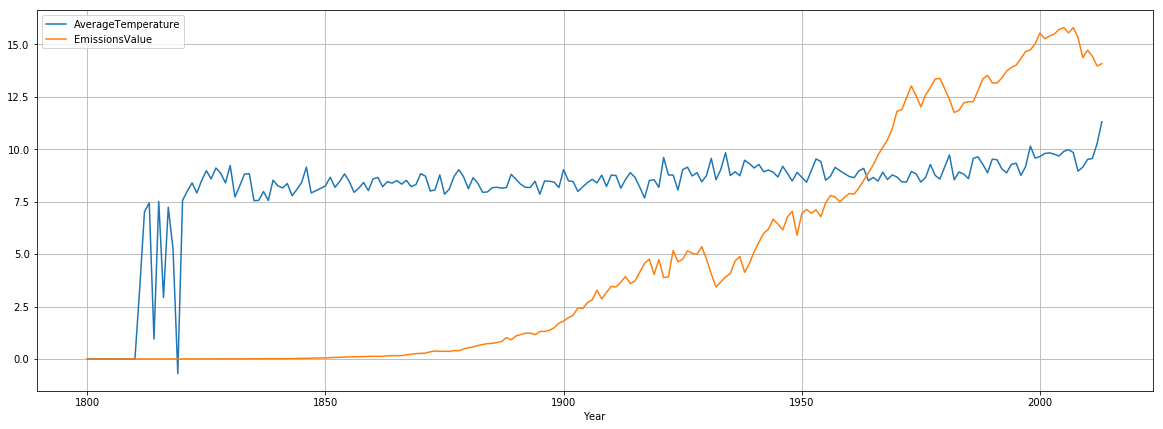

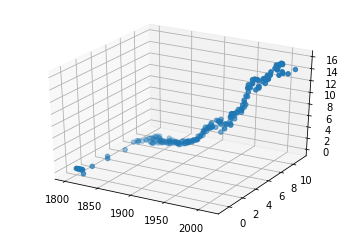

In [333]:
us_data.set_index('Year').plot(figsize=(20,7), grid=True)

year = us_data.values.T.tolist()[0]
avg_temp = us_data.values.T.tolist()[2]
emissions = us_data.values.T.tolist()[3]

#fig, ax = plt.subplots(figsize=(20, 7))
#ax.plot(year, avg_temp, label="temp")
#ax.plot(year, emissions, label="co2")
#ax.legend()
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(year, avg_temp, emissions)

In [334]:
# Get all data for sample
all_data = combined_datasets_cp.copy()
all_data = all_data.groupby(['Year'])[['AverageTemperature', 'EmissionsValue']].mean()
all_data = all_data.reset_index()
# Normalize -> 10^3
all_data['EmissionsValue'] = all_data['EmissionsValue']/1000
all_data

,Year,AverageTemperature,EmissionsValue
0,1751,5.890000,2.552000
1,1752,3.130000,2.553000
2,1753,8.430000,2.553000
3,1754,8.340000,2.554000
4,1755,8.050000,2.555000
5,1756,8.540000,2.731000
6,1757,8.500000,2.732000
7,1758,7.700000,2.733000
8,1759,8.680000,2.734000
9,1760,8.030000,2.734000


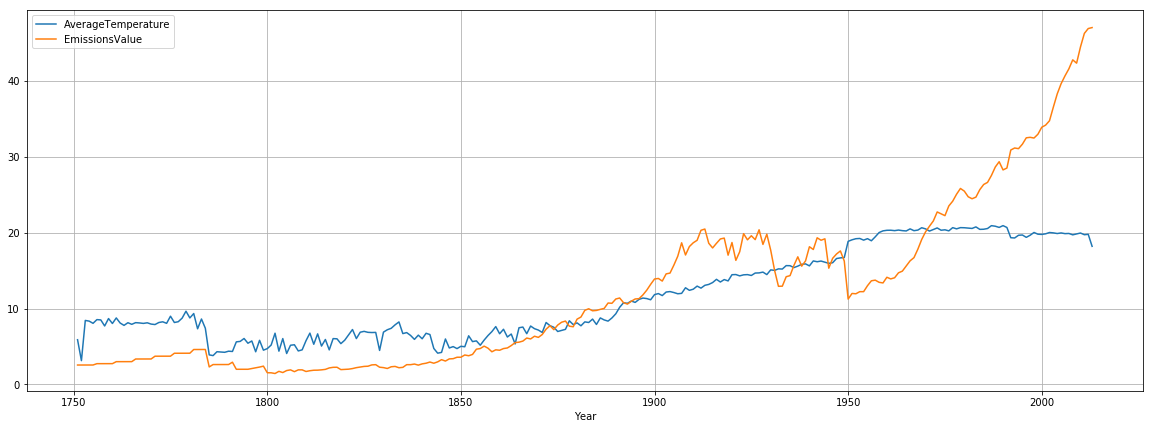

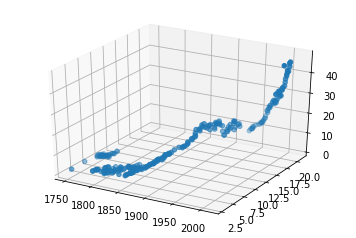

In [335]:
all_data.set_index('Year').plot(figsize=(20,7), grid=True)

year = all_data.values.T.tolist()[0]
avg_temp = all_data.values.T.tolist()[1]
emissions = all_data.values.T.tolist()[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(year, avg_temp, emissions)

In [336]:
# Group by Country to get the an average for the countries with most emissions
grouped_by_country = combined_datasets_cp.copy()
grouped_by_country = grouped_by_country.groupby([grouped_by_country['Country']])[['EmissionsValue']].mean()
grouped_by_country = grouped_by_country.round(2)
grouped_by_country = grouped_by_country.reset_index()
grouped_by_country = grouped_by_country.sort_values('EmissionsValue', ascending=False)

# Get the top 5 countries
top_countries = grouped_by_country[:5].copy()

# Other countries
other_countries = pd.DataFrame(data = {
    'Country' : ['Others'],
    'EmissionsValue' : [grouped_by_country['EmissionsValue'][5:].sum()]
})

top_countries = pd.concat([top_countries, other_countries])
top_countries

,Country,EmissionsValue
186,United States,472324.32
147,Russia,454607.68
36,China,396842.48
69,Germany,105333.05
92,Japan,105134.97
0,Others,1304397.47


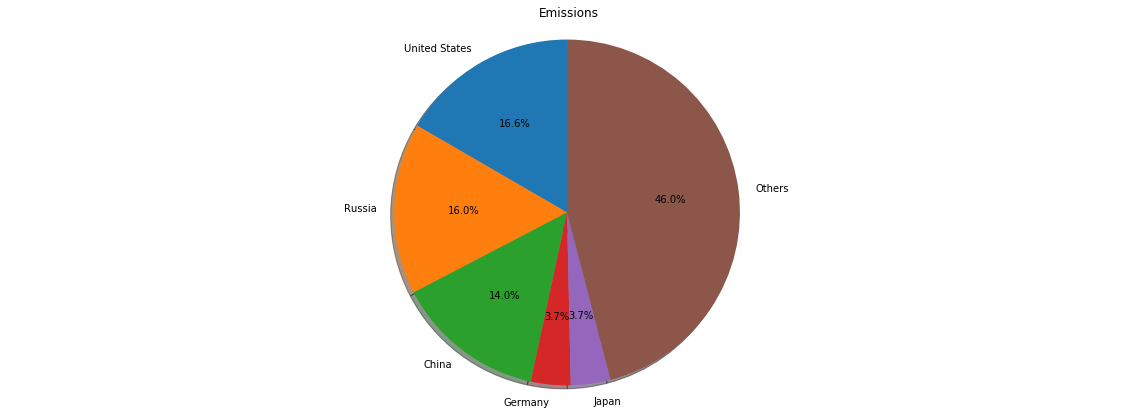

In [337]:
grouped_by_country = grouped_by_country[grouped_by_country['EmissionsValue']>50000]

names = top_countries.values.T.tolist()[0]
values = top_countries.values.T.tolist()[1]
 
# Plot
fig, axes = plt.subplots(figsize = (20,7))
plt.pie(values, labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
axes.set_title('Emissions')
plt.show()

In [303]:
# Save dataframe to csv
combined_datasets.to_csv('Datasets/TempEmissionsDataRaw.csv', index=False, encoding='utf-8')
all_data.to_csv('Datasets/TempEmissionsData.csv', index=False, encoding='utf-8')